## Istosmjerni motor

In [1]:
# priprema okruženja
%matplotlib nbagg
from utils import f_ode, resp_plot, step_signal, mux
import math

In [2]:
def d_motor(L_a, R_a, Kb, J, k_f):
    def deriv(t, u, i_a, w):
        u_b = w*Kb
        di_a = 1/L_a*(u[0]-i_a*R_a-u_b)
        M_m = Kb*i_a
        dw = 1/J*(M_m+u[1]-k_f*w)        
        
        return [di_a, dw]
    
    return deriv

<IPython.core.display.Javascript object>


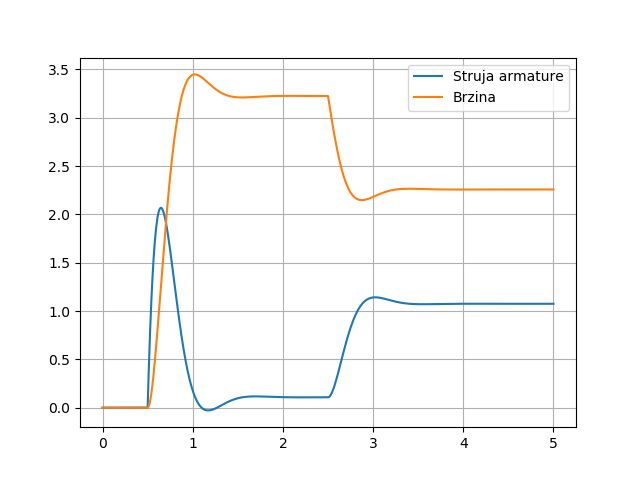

In [3]:
t, y = f_ode(d_motor(L_a=0.3, R_a=3, Kb=3, J=0.5, k_f=0.1), #matematicki model
            [0, 0],# pocetni uvjeti
             mux([step_signal(t_step=0.5, y0=0, y1=10), # ulazni signal
                  step_signal(t_step=2.5, y0=0, y1=-3)]),
            5)  # vrijeme simulacije

resp_plot(t, y, 'Odziv', ['Struja armature', 'Brzina']).show()